Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1)]               0         
                                                                 
 ld0-sin-100n (Dense)        (None, 100)               200       
                                                                 
 ld1-cos-100n (Dense)        (None, 100)               10100     
                                                                 
 ld2-sin-100n (Dense)        (None, 100)               10100     
                                                                 
 output-linear (Dense)       (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


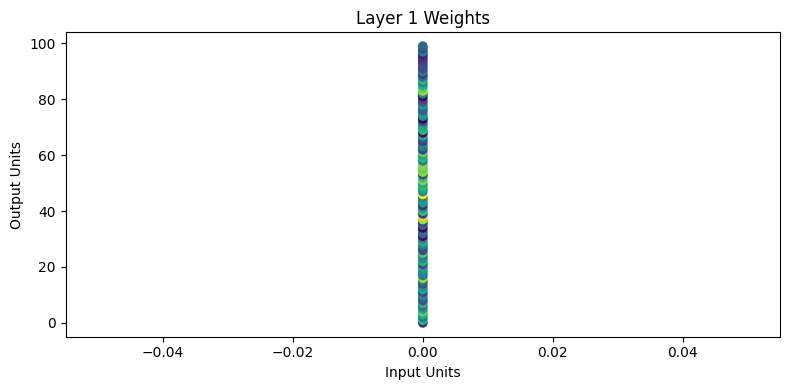

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from models.neu_nn import NEU_NN

# Load or create your trained model
# model = tf.keras.models.load_model('./weights/EXP_Robin_100Hz-last')
model = NEU_NN()

# Retrieve the weights of all layers
all_layer_weights = [layer.get_weights()[0] for layer in model.layers if len(layer.get_weights()) > 0]

# Create subplots for each layer's weights
fig, axes = plt.subplots(len(all_layer_weights), 1, figsize=(8, len(all_layer_weights) * 4))

# Plot the weights for each layer
for i, weights in enumerate(all_layer_weights):
    # Reshape the weights if necessary
    weights = np.reshape(weights, (weights.shape[0], -1))

    # Get the x and y coordinates for the scatter plot
    x = np.arange(weights.shape[0])
    y = np.arange(weights.shape[1])

    # Create a meshgrid of the coordinates
    X, Y = np.meshgrid(x, y)

    # Flatten the weights and coordinates
    weights = weights.flatten()
    X = X.flatten()
    Y = Y.flatten()

    # Create a scatter plot of the weights
    ax = axes[i] if len(all_layer_weights) > 1 else axes
    ax.scatter(X, Y, c=weights, cmap='viridis')
    ax.set_title(f'Layer {i+1} Weights')
    ax.set_xlabel('Input Units')
    ax.set_ylabel('Output Units')
    # ax.colorbar()

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


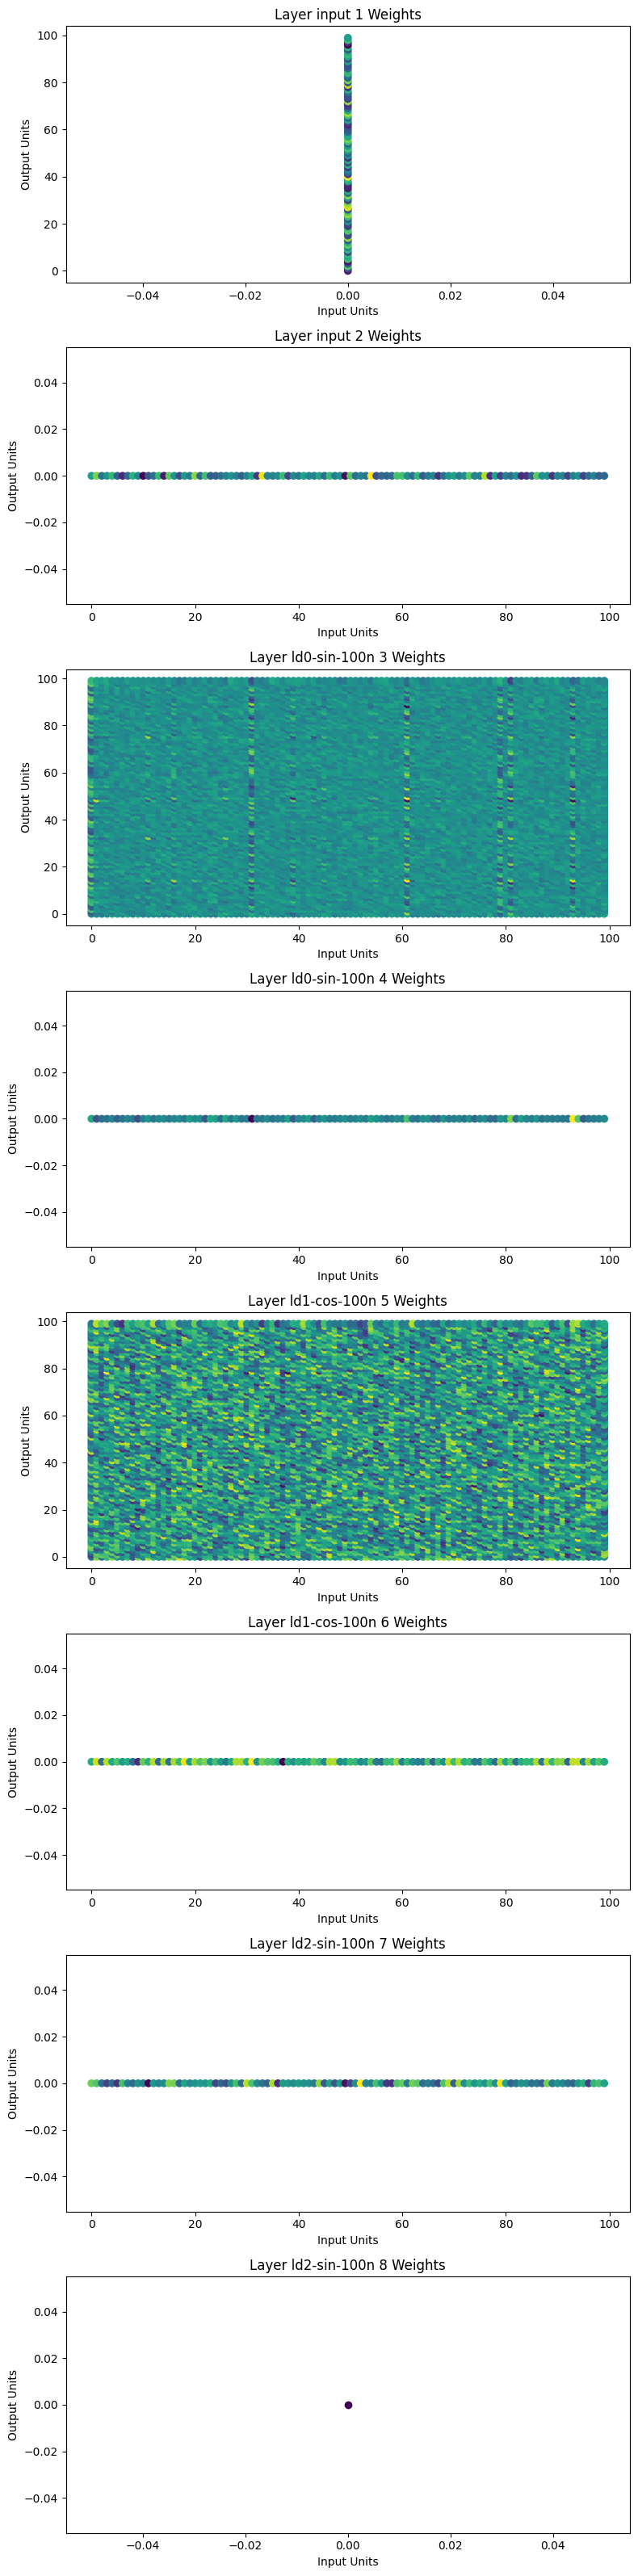

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load or create your trained model
NN = tf.keras.models.load_model('weights/EXP_Robin_500Hz-last')

# Retrieve the weights of all layers
all_layer_weights = NN.model.get_weights()
layer_names = [layer.name for layer in NN.model.layers]

# Create subplots for each layer's weights
fig, axes = plt.subplots(len(all_layer_weights), 1, figsize=(8, len(all_layer_weights) * 4))

# Plot the weights for each layer
for i, weights in enumerate(all_layer_weights):
    if len(weights) > 0:
        # Reshape the weights if necessary
        weights = np.reshape(weights, (weights.shape[0], -1))

        # Get the x and y coordinates for the scatter plot
        x = np.arange(weights.shape[0])
        y = np.arange(weights.shape[1])

        # Create a meshgrid of the coordinates
        X, Y = np.meshgrid(x, y)

        # Flatten the weights and coordinates
        weights = weights.flatten()
        X = X.flatten()
        Y = Y.flatten()

        # Create a scatter plot of the weights
        ax = axes[i] if len(all_layer_weights) > 1 else axes
        ax.scatter(X, Y, c=weights, cmap='viridis')
        ax.set_title(f'Layer {layer_names[i//2]} {i+1} Weights')
        ax.set_xlabel('Input Units')
        ax.set_ylabel('Output Units')


# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


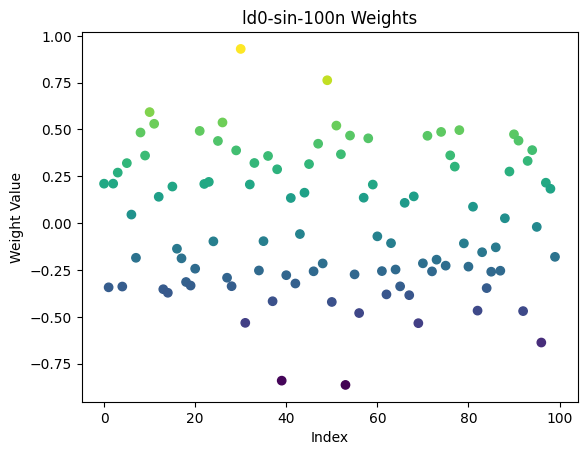

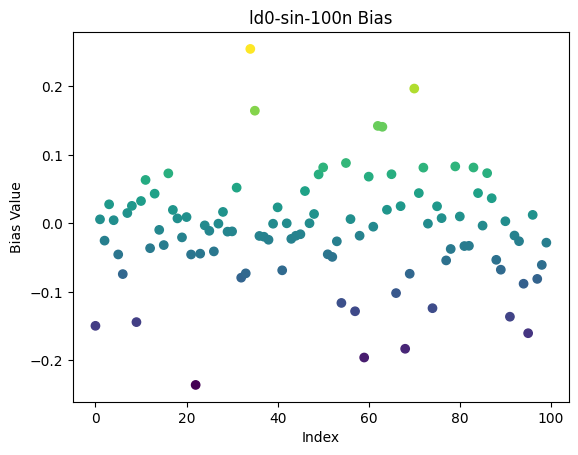

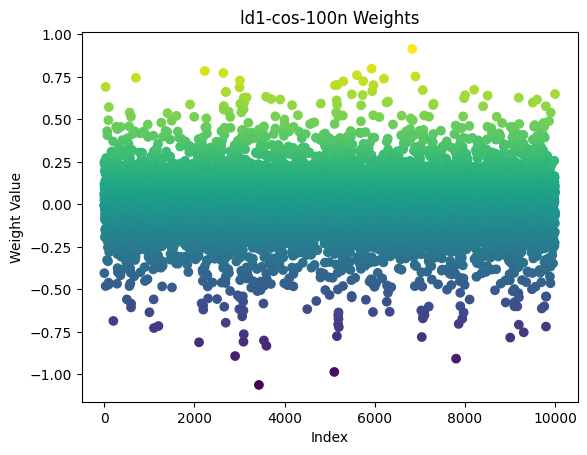

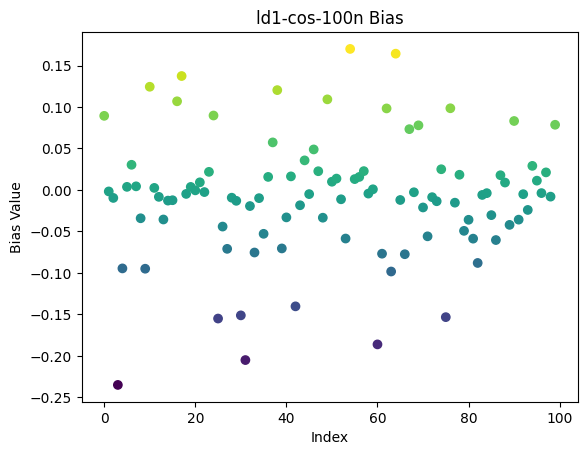

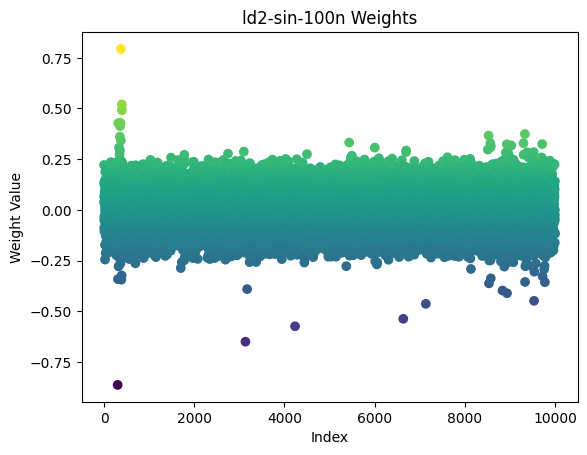

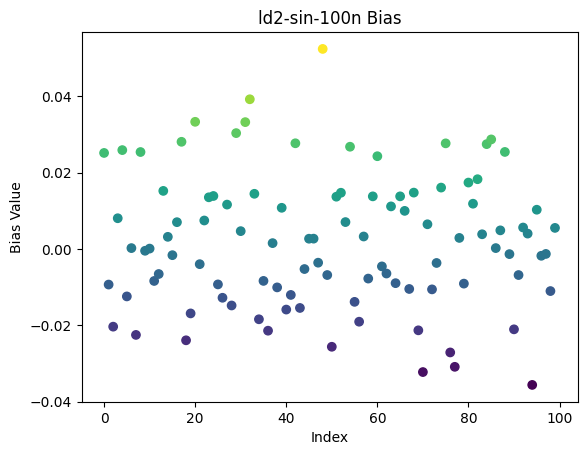

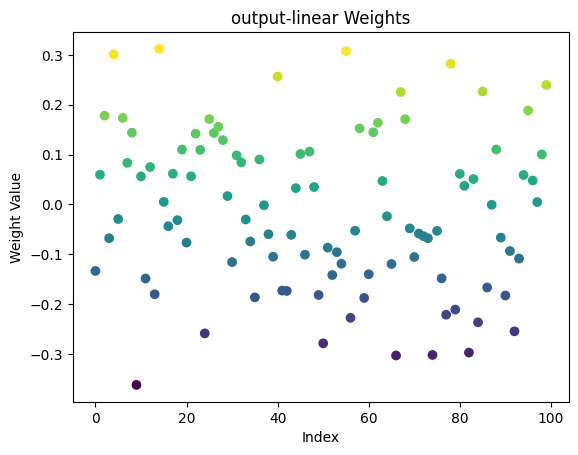

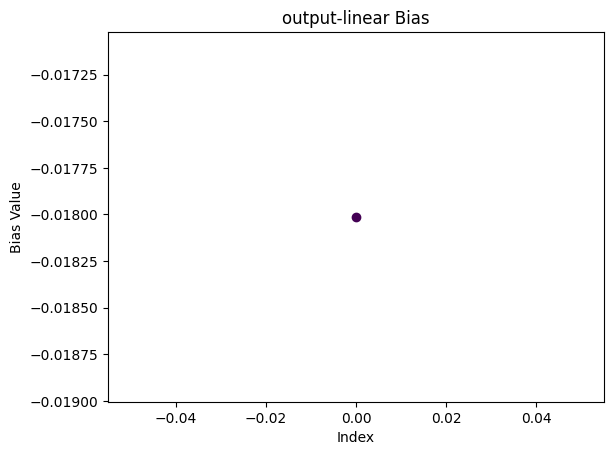

In [72]:
import matplotlib.pyplot as plt
import numpy as np

saved_model_path = 'weights/EXP_Robin_1000Hz-last'
nn = tf.keras.models.load_model(saved_model_path)
loaded_model = nn.model


for layer in loaded_model.layers:
    weights = layer.get_weights()
    if len(weights) == 1:
        # Plot the weights
        plt.figure()
        plt.title(layer.name + ' Weights')
        flattened_weights = weights.flatten()
        x = np.arange(len(flattened_weights))
        plt.scatter(x, flattened_weights, c=flattened_weights, cmap='viridis')
        plt.xlabel('Index')
        plt.ylabel('Weight Value')
        plt.show()
    elif len(weights) == 2:
        # Plot the weights
        plt.figure()
        plt.title(layer.name + ' Weights')
        flattened_weights = weights[0].flatten()
        flattened_bias = weights[1].flatten()
        x = np.arange(len(flattened_weights))
        plt.scatter(x, flattened_weights, c=flattened_weights, cmap='viridis')
        plt.xlabel('Index')
        plt.ylabel('Weight Value')

        plt.figure()
        plt.title(layer.name + ' Bias')
        flattened_bias = weights[1].flatten()
        x = np.arange(len(flattened_bias))
        plt.scatter(x, flattened_bias, c=flattened_bias, cmap='viridis')
        plt.xlabel('Index')
        plt.ylabel('Bias Value')
        plt.show()






In [45]:
weights = nn.model.get_weights()

In [54]:
for i, layer_weights in enumerate(weights):

    print(f"Weights of layer {i}:")
    print(layer_weights)
    print(f"Shape of weights: {layer_weights.shape}")

Weights of layer 0:
[[ 0.42608622 -0.1961813   0.20654437  0.42359415 -0.47516558  0.35648745
  -0.15794842 -0.29694635  0.32885596  0.419898    0.2741238   0.09571714
   0.50767577  0.4836642  -0.29843622 -0.16807458 -0.37568235  0.22284262
  -0.22790982 -0.430944    0.4338495   0.58846    -0.3562155  -0.36805296
  -0.4083447  -0.241793   -0.5041889   0.40564972 -0.17407355  0.44721955
  -0.3316712   0.22717154 -0.21529447 -0.22581373 -0.33329576 -0.21307561
  -0.23320426  0.40938956 -0.18559036  0.36452162 -0.26458624 -0.5945037
  -0.3051602   0.11989888 -0.13780047 -0.25434345 -0.5480919  -0.359363
   0.03443533 -0.24045461  0.4428567  -0.35189128 -0.2168682  -0.27406514
  -0.33620498  0.11393525 -0.23149183 -0.36181435 -0.33007413 -0.14443006
  -0.37386826 -0.23334901  0.19390908  0.34304485  0.23260652  0.32480612
  -0.26444343  0.44094715 -0.31839535  0.58307076  0.5655503   0.30999663
  -0.5128645   0.21951637 -0.24579768  0.27312118  0.18145485 -0.39345312
   0.16680016  0.1748

In [64]:
for i, layer in enumerate(nn.model.layers):
    weights = layer.get_weights()
    if i != 0:
        print(f"Len of {layer.name} weights = {len(weights[0])}")
        print(f"Len of {layer.name} bias = {len(weights[1])}")
    else:
        print(f"Len of {layer.name} weights = {len(weights)}")

Len of input weights = 0
Len of ld0-sin-100n weights = 1
Len of ld0-sin-100n bias = 100
Len of ld1-cos-100n weights = 100
Len of ld1-cos-100n bias = 100
Len of ld2-sin-100n weights = 100
Len of ld2-sin-100n bias = 100
Len of output-linear weights = 100
Len of output-linear bias = 1
